In [2]:
pkg load signal


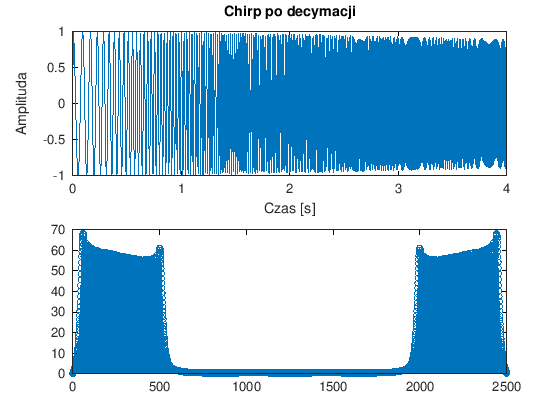

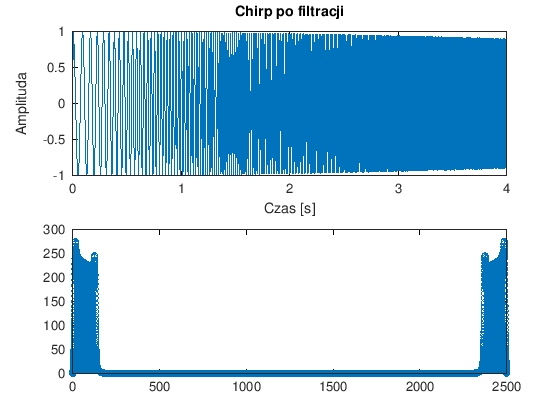

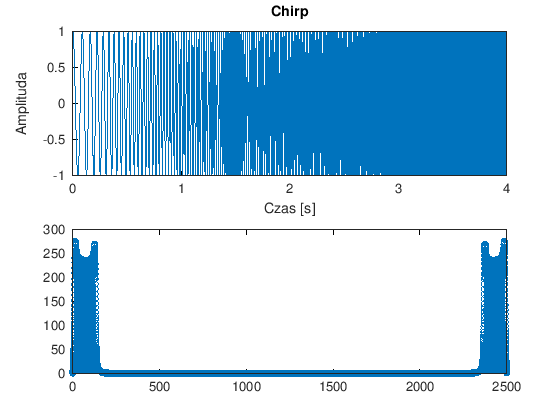

In [6]:
fs=2500;
t=0:1/fs:4-1/fs;
sig_chirp=chirp(t, 10, 3, 100);

%widmo
tf_sig_chirp = abs(fft(sig_chirp));
N_tf = length(tf_sig_chirp);
f_step = fs/N_tf;
f_vec=0:f_step:fs-f_step;

%filtry
M = 11;
f_odciecia = 300;
filtr = fir1(M-1, f_odciecia/(fs/2), 'low');
chirp_filtered = filter(filtr, 1, sig_chirp);

tf_chirp_filtered = abs(fft(chirp_filtered));

%decymacja - zmiana wektora czasu i czestotliwosci 
x = floor(fs/(300*2));
chirp_dec= decimate(chirp_filtered, x);
t_dec=0:(1/fs)*x:4-(1/fs);

tf_chirp_dec = abs(fft(chirp_dec));
N_tf_dec = length(tf_chirp_dec);
f_step_dec = fs/N_tf_dec;
f_vec_dec=0:f_step_dec:fs-f_step_dec;


figure
subplot(2,1,1)
plot(t, sig_chirp)
xlabel('Czas [s]')
ylabel('Amplituda')
title('Chirp')

subplot(2,1,2)
xlabel('Czestotliwosc [Hz]')
ylabel('|H(j/omega)|')
title('Widmo - Chirp')
stem(f_vec, tf_sig_chirp)


figure
subplot(2,1,1)
plot(t, chirp_filtered)
xlabel('Czas [s]')
ylabel('Amplituda')
title('Chirp po filtracji')

subplot(2,1,2)
xlabel('Czestotliwosc [Hz]')
ylabel('|H(j/omega)|')
title('Widmo - Chirp po filtracji')
stem(f_vec, tf_chirp_filtered)

figure
subplot(2,1,1)
plot(t_dec, chirp_dec)
xlabel('Czas [s]')
ylabel('Amplituda')
title('Chirp po decymacji')

subplot(2,1,2)
xlabel('Czestotliwosc [Hz]')
ylabel('|H(j/omega)|')
title('Widmo - Chirp po decymacji')
stem(f_vec_dec, tf_chirp_dec)



